![](https://i.imgur.com/62lgQpf.jpg)

-----

## About the dataset
https://www.kaggle.com/nowke9/ipldata
- `teams.csv`: list of IPL teams
- `matches.csv`: IPL match data
- `deliveries.csv`: Ball by ball data of IPL matches.

## Questions we are gonna answer...

- Which team has won/lost maximum number of matches while chasing?
- Which toss decision is best for each ground?
- Which player has won maximum number of MoM awards while chasing?

- Which batsman has played maximum number of dot balls?
- Which batsmen came to crease but never got a chance to face a ball?
- Which bowler has hit for maximum number of 1s/2s/3s/4s/6s?
- Which batsman got stumped out maximum number of times?
- Which non-striker has been part of maximum number of runouts?


Finally,

**How to make a generalized IPL query engine?**

In [1]:
import pandas as pd

In [2]:
teams_df = pd.read_csv("data/teams.csv")

In [3]:
teams_df.head()

,name
0,Mumbai Indians
1,Kings XI Punjab
2,Chennai Super Kings
3,Royal Challengers Bangalore
4,Kolkata Knight Riders


In [4]:
matches_df = pd.read_csv("data/matches.csv", index_col='id')

In [5]:
matches_df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
deliveries_df = pd.read_csv("data/deliveries.csv")

In [7]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Which team has won/lost maximum number of matches while chasing?

In [8]:
def set_first_innings(match):
    if (match.team1 == match.toss_winner and match.toss_decision == "bat") \
    or (match.team1 != match.toss_winner and match.toss_decision == "field"):
        return match.team1
    else:
        return match.team2
    
    
def set_second_innings(match):
    if (match.team1 == match.toss_winner and match.toss_decision == "field") \
    or (match.team1 != match.toss_winner and match.toss_decision == "bat"):
        return match.team1
    else:
        return match.team2

In [9]:
matches_df['inning1'] = matches_df.apply(set_first_innings, axis=1)
matches_df['inning2'] = matches_df.apply(set_second_innings, axis=1)

In [10]:
# maximum number of matches won while chasing
matches_df.query("winner == inning2")['inning2'].value_counts()

Kolkata Knight Riders          54
Mumbai Indians                 47
Royal Challengers Bangalore    47
Delhi Daredevils               42
Chennai Super Kings            42
Kings XI Punjab                41
Rajasthan Royals               41
Sunrisers Hyderabad            24
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Rising Pune Supergiants         5
Kochi Tuskers Kerala            4
Name: inning2, dtype: int64

In [11]:
# maximum number of matches lost while chasing
matches_df.query("winner != inning2")['inning2'].value_counts()

Delhi Daredevils               47
Royal Challengers Bangalore    43
Kings XI Punjab                37
Kolkata Knight Riders          36
Mumbai Indians                 33
Rajasthan Royals               30
Chennai Super Kings            22
Deccan Chargers                21
Pune Warriors                  20
Sunrisers Hyderabad            14
Gujarat Lions                   4
Kochi Tuskers Kerala            3
Rising Pune Supergiant          3
Rising Pune Supergiants         2
Name: inning2, dtype: int64

## Which toss decision is best for each ground?

In [12]:
%matplotlib inline

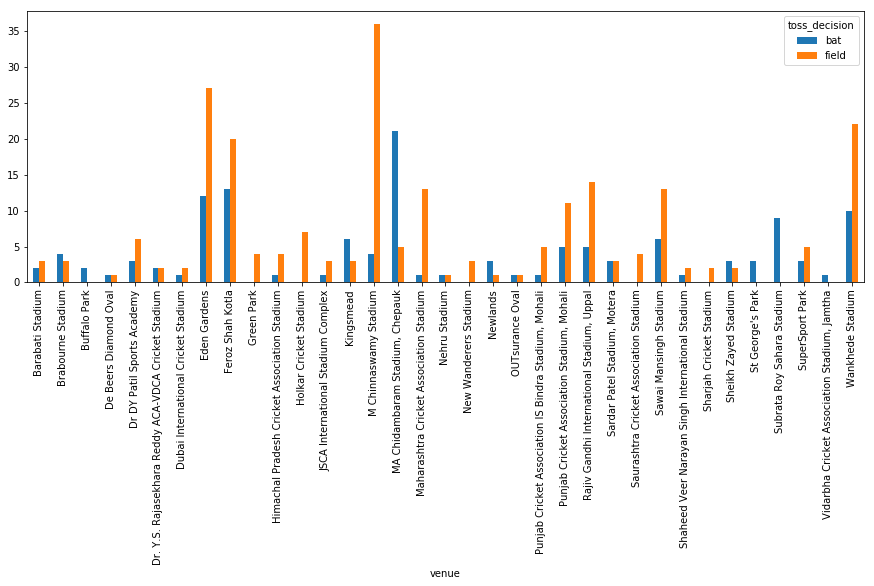

In [13]:
matches_df.query("toss_winner == winner").groupby('venue')['toss_decision'].value_counts().unstack(level=1).plot.bar(figsize=(15,5))

## Which player has won maximum number of MoM awards while chasing?

In [14]:
matches_df.query("winner == inning2")['player_of_match'].value_counts().sort_values(ascending=False).head()

YK Pathan    11
CH Gayle     10
G Gambhir    10
DR Smith      9
RG Sharma     9
Name: player_of_match, dtype: int64

## Which batsman has played maximum number of dot balls?

In [15]:
deliveries_df.query("batsman_runs == 0 and extra_runs == 0")['batsman'].value_counts().head()

V Kohli       1280
S Dhawan      1193
G Gambhir     1170
RG Sharma     1164
RV Uthappa    1120
Name: batsman, dtype: int64

## Which batsmen came to crease but never got a chance to face a ball?

In [16]:
a = deliveries_df['non_striker'].value_counts().index

In [17]:
b = deliveries_df['batsman'].value_counts().index

In [18]:
a.difference(b)

Index(['A Nel', 'BW Hilfenhaus', 'C Ganapathy', 'TP Sudhindra'], dtype='object')

## Which batsman has hit for maximum number of 1s/2s/3s/4s/6s?

In [19]:
deliveries_df.query("batsman_runs == 6")['batsman'].value_counts().head()

CH Gayle          293
AB de Villiers    188
MS Dhoni          186
SK Raina          186
RG Sharma         185
Name: batsman, dtype: int64

## Which batsman got stumped out maximum number of times?

In [20]:
deliveries_df.query("dismissal_kind == 'stumped'")['batsman'].value_counts().head()

AT Rayudu         7
SK Raina          7
RV Uthappa        7
AB de Villiers    6
PA Patel          6
Name: batsman, dtype: int64

## Which non-striker has been part of maximum number of runouts?

In [21]:
deliveries_df.query("dismissal_kind == 'run out'")['non_striker'].value_counts().head()

SK Raina          16
RG Sharma         15
KD Karthik        15
AB de Villiers    14
YK Pathan         14
Name: non_striker, dtype: int64


---

# A generalized query engine...

[IPLQE](https://iplqe.herokuapp.com)

**Actors are:**
- Batsmen (batsman)
- Bowlers (bowler)
- Fielders (fielders)
- Non strikers (non_striker)
- Dismissed batsmen (player_out)
- Batting teams (bat_team)
- Bowling teams (bowl_team)

**To calculate parameters:**
- runs (total_runs)
- runs by bat (batsman_runs)
- extra runs (extra_runs)
- wickets (player_out)
- deliveries (ball)

**Filters available:**
- season
- innings
- bat_team
- bowl_team
- over
- ball
- batsman_runs
- extra_runs
- total_runs
- extra_type
- wicket_kind


![](https://i.imgur.com/mernK4C.png)

In [ ]:
filters = "inning == 2 and over == 20"

In [ ]:
actor = "batsman"

In [ ]:
to_calculate = "batsman_runs"

In [ ]:
deliveries_df.query(filters).groupby(actor)[to_calculate].sum().sort_values(ascending=False).head(10)